<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/OC_SMF_FuncionesActivacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de Activación

**Oliver Cuate**

*27 de marzo de 2025*

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

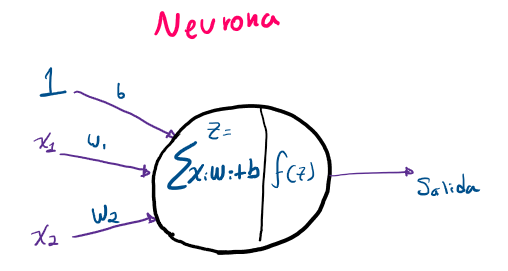

## Función de activación lineal

In [ ]:
#función lineal
def funcionLineal(z,a):
  return a*z

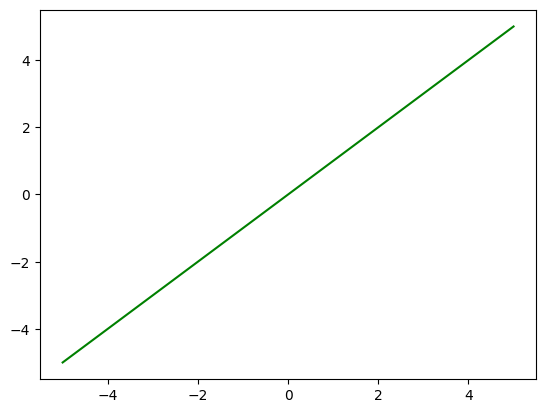

In [ ]:
#Se crea un vector
z = np.linspace(-5, 5)

#Se grafica la función lineal
plt.plot(z, funcionLineal(z,1), '-g')
plt.show()

## Función de activación escalon

In [ ]:
#Función escalon
def funcionEscalon(z):
  r = np.zeros(z.shape, dtype=int)
  r[z >= 0] = 1
  return r

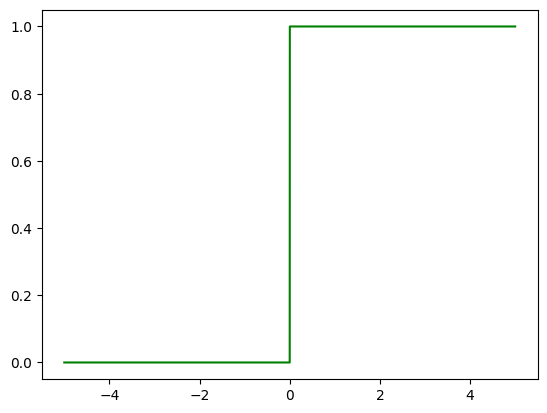

In [ ]:
#Se crea un vector
z = np.linspace(-5, 5, 10000)

#Se grafica la función step
plt.plot(z, funcionEscalon(z), '-g')
plt.show()

## Función de activación sigmoide

Una función de activación clásica es la función sigmoide o sigmoidal, definida de la siguiente manera:

$$ f(a,x,c) = \dfrac{1}{1+e^{-a(x-c)}} $$

Dependiendo del signo del parámeto $a$, la función sigmoide se abre hacia la izquierda o hacia la derecha. Es apropiada para representar conceptos tales como "muy grande" o "muy negativo". En la práctica, suele usarse $a=1$ y $c=0$; es decir:

$$ f(z) = \dfrac{1}{1+e^{-z}} $$

Esta función proyecta salidas a números reales de entrada al intervalo $[0,1]$. Sin embargo, posee dos inconvenientes:
* **Saturación del gradiente:** Cuando el valor de la función de activación se aproxima a los extremos (0 o 1), el gradiente de la función tiende a 0, lo que repercute en el ajuste de los pesos de las redes.
* **Pesos positivos de forma continua:** El valor medio de la función de salida no es cero, lo que origina que los pesos tiendan a ser positivos.

Estos dos fenómenos provocan una convergencia lenta de los parámetros, afectando la eficiencia del entrenamiento.

**Ejercicio:** Encontar el máximo del gradiente de la sigmoide.

In [ ]:
# Función Sigmoide
def sigmoide(z):
    return 1/(1 + np.exp(-z))

def dsig(z):
  return sigmoide(z)*(1-sigmoide(z))

def ddsig(z):
  return dsig(z)*(1-2*sigmoide(z))

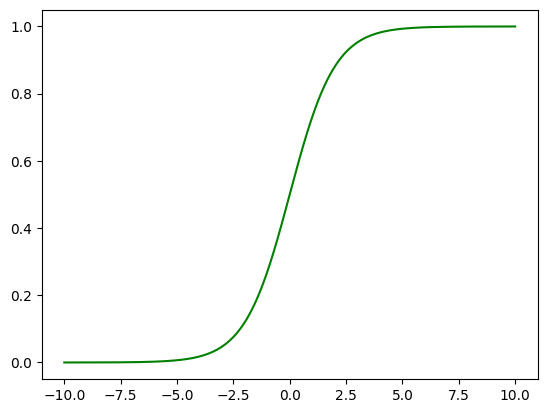

In [ ]:
z = np.linspace(-10, 10,1000)

plt.plot(z, sigmoide(z), '-g')
#plt.plot(z, ddsig(z), '-g')
plt.show()

Una variación es la llamada **función sigmoide dura** *(hard-sigmoid)*:
$$ f(z) = \max\{ 0, \min\{ 1, (z+1)/2 \} \} $$

In [ ]:
#funcion hard-sigmoid
def hardSigmoid(z):
  return np.maximum(0,np.minimum(1,(z+1)/2))


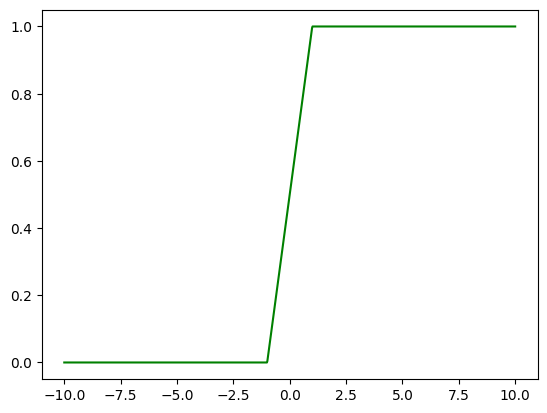

In [ ]:
# Graficar
z = np.linspace(-10, 10,1000)

plt.plot(z, hardSigmoid(z), '-g')
plt.show()

## Función de activación tangente hiperbólica

La *tanh* proporciona salidas reales en el rango definido y se define como:

$$ f(z) = \dfrac{e^{z}-e^{-z}}{e^{z}+e^{-z}} $$

Es una variante de la función sigmoide, así que tambnién se escribe de la siguiente manera:

$$ \tanh (z) = 2 \, \mbox{sigmoide}(2z) - 1 $$

Por lo que presenta el mismo problema de saturación del gradiente.

In [ ]:
# Función tangente hiperbólica
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z) + np.exp(-z))

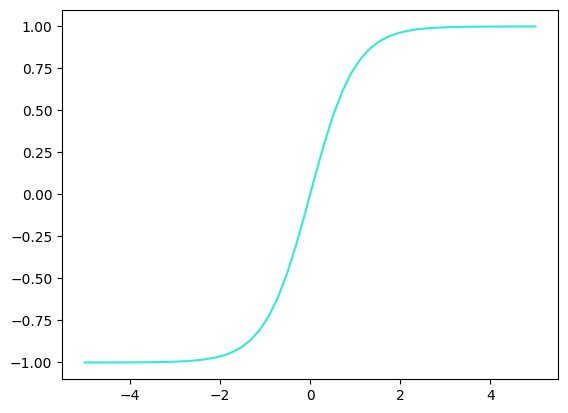

In [ ]:
_z = np.linspace(-5, 5)

plt.plot(_z, tanh(_z), c=[0.188,0.92,0.85])
plt.show()

## Función de activación ReLU

La función Unidad Lineal Rectificadora *(ReLU, Rectified Linear Unit)* se define como:

$$ f(z) = \max\{ 0, z \} $$

y tiene las siguientes características:

* **Gradiente no saturado:** Debido a que $z \geq 0$, el problema de dispersión del gradiente en el proceso de propagación inversa se ve reducido, por lo tanto, los parámetros en la primera capa de la red neuronal pueden actualizarse rápidamente.
* **Baja complejidad computacional:** Dada su simple defincición.

Con respecto a su derivada/gradiente tiene las siguientes caraterísticas:
* En $z=0$ no es derivable, por lo que es habitual asignar un valor arbitrario en este caso, por ejemplo, se suele usar 0, 0.5, o bien, 1.
* La neurona ReLU puede morir cuando recibe un gradiente negativo alto durante la retropropagación. Esto se puede evitar al inicializar cuidadosamente los pesos o utilizar ReLU con "fugas" (LReLU, Leaky ReLU).

In [ ]:
#Función ReLU
def funcion_ReLU(z):
  return np.maximum(0,z)

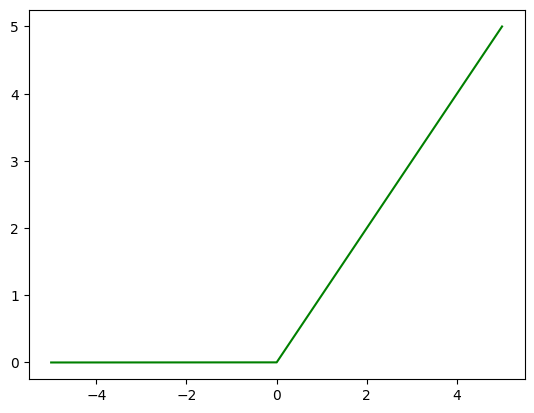

In [ ]:
_z = np.linspace(-5, 5, 100000)
plt.plot(_z, funcion_ReLU(_z), c = 'green')
plt.show()

## Función de activación Leaky ReLU

In [ ]:
#Función LReLU
def funcion_LReLU(z):
  r = np.copy(z)
  r[z<0]=z[z<0]*0.1
  return r

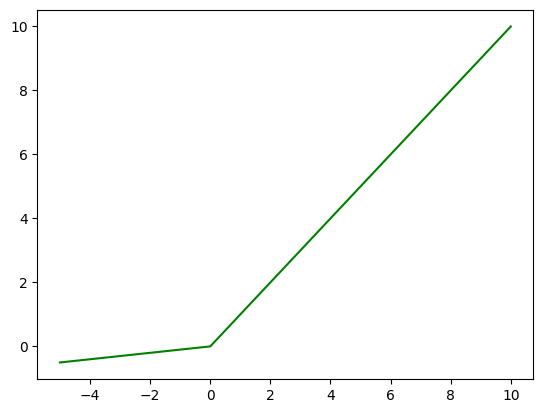

In [ ]:
z = np.linspace(-5,10,10000)

plt.plot(z,funcion_LReLU(z), c='green')
plt.show()

## Otras variantes de ReLU

### ReLU6
En algunos tipos de redes (MobileNet, por ejemplo), se define una variante de ReLU, llamada función ReLU6, de la siguiente manera:

$$ f(z) = \mbox{ReLU6}(z) = \min\{ \max\{ z, 0 \}, 6 \} $$

In [ ]:
#funcion  Relu6
def ReLU6(z):
  return np.minimum(np.maximum(z,0),6)

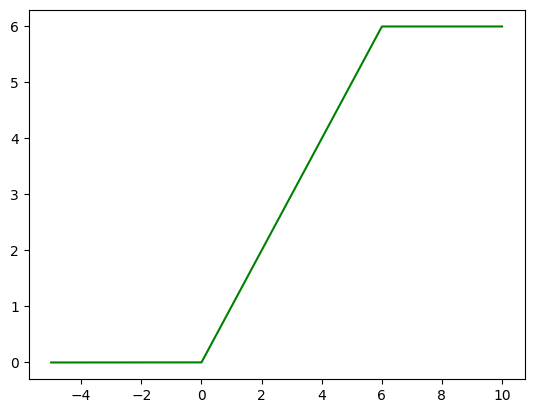

In [ ]:
# Graficar
z = np.linspace(-5,10,10000)

plt.plot(z,ReLU6(z), c='green')
plt.show()

A partir de ReLU6, se define *hard-swish (HS)*, también llamada *h-swish*:

$$ HS(z) = z \dfrac{\mbox{ReLU6(z+3)}}{6} $$

In [ ]:
#Hard-Swish
def HS(z):
  re=ReLU6(z+3)
  hs=z*re/6
  return hs

In [ ]:
# Graficar

### PReLU

La función ReLU paramétrica *(PReLU, Parametric ReLU)* se define como:

$$ f(z, \alpha) = \Big\{  \begin{array}{ll}
z & \mbox{ si } z > 0 \\
\alpha z & \mbox{ si } z \leq 0  \end{array}  $$

Claramente, si $\alpha=0$, tenemos la función ReLU; mientras que, si $\alpha$ positivo y cercano a 0 tenemos a LReLU.

Sin embargo, esta función adquiere su significado (y de ahí su nombre) cuando incluimos a $\alpha$ como un parámetro a aprender durante el proceso de entrenamiento.

### ELU

Unidad lineal exponencial *(ELU, Exponential Lineal Unit )*:

$$ f(z,\alpha) = \Big\{  \begin{array}{ll}
z & \mbox{ si } z > 0 \\
\alpha (e^z-1) & \mbox{ si } z \leq 0  \end{array} $$

El parámetro $\alpha$, controla el valor para el cual se produce la saturación para valores de $x$ negativos.

In [ ]:
# Definir ELU
def ELU(z,alpha):
  r=np.copy(z)
  r[z>0]=z[z>0]
  r[z<=0]=alpha*(np.exp(z[z<=0])-1)
  return r

In [ ]:
# Graficar con \alpha = {0.1, 1.0}

### SELU

Unidad lineal exponencial escalada *(Scaled Exponential Linear Unit)* es una modificación de ELU:

$$ f(z,\alpha,\lambda) = \lambda \Big\{  \begin{array}{ll}
z & \mbox{ si } z > 0 \\
\alpha (e^z-1) & \mbox{ si } z \leq 0  \end{array} $$

In [ ]:
#Definir SELU
def SELU(z,alpha,lam):
  r=np.copy(z)
  r[z>0]=z[z>0]
  r[z<=0]=alpha*(np.exp(z[z<=0])-1)
  return lam*r

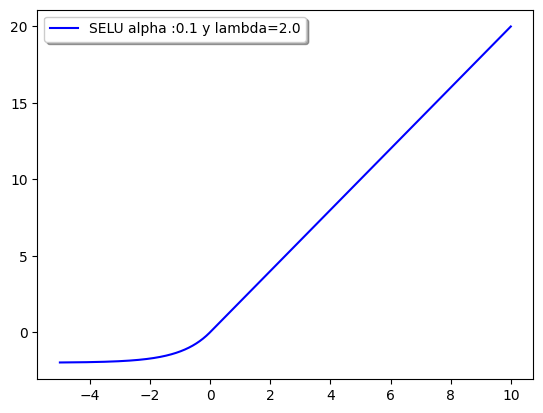

In [ ]:
# Graficar con \alpha = 1.0 y \lambda = 2.0
x=np.linspace(-5,5,10000)
fig, ax = plt.subplots()
ax.plot(z, SELU(z,1.0,2.0), c = 'blue',label='SELU alpha :0.1 y lambda=2.0')
legend = ax.legend(loc='upper left', shadow=True, fontsize='10')
plt.show()


### Función Swish

Se define como el producto de $z$ por la función sigmoide parametrizada con $\beta$, es decir:

$$ \mbox{Swish}(z) = z \, \mbox{sigmoide}(\beta z) $$

Usualmnete, $\beta = 3$.

In [ ]:
#funcion Swish
def swish(z,b):
  return z*sigmoide(b*z)

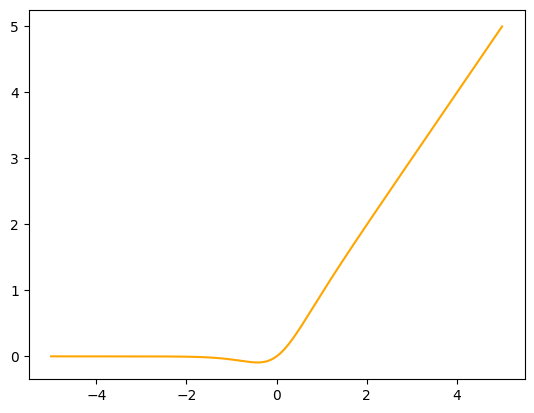

In [ ]:
# Graficar
z = np.linspace(-5, 5,1000)
plt.plot(z, swish(z,3), c='orange')
plt.show()

### SiLU

La *Sigmoid-weighted Linear Unit, (SiLU)* es equivalente a una Swish con $\beta = 1 $ y se usa en aprendizaje por refuerzo.

$$ \mbox{SiLU}(z) = z \, \mbox{sigmoide}(z) = \dfrac{z}{1+e^{-z}} $$

También es posible definir su función derivada, conocida como dSiLU, en términos de la sigmoide.

**Ejercicio:** Encontar la derivada de la función SiLU.

In [ ]:
#funcion SiLU
def SiLU(z):
  return z*sigmoide(z)

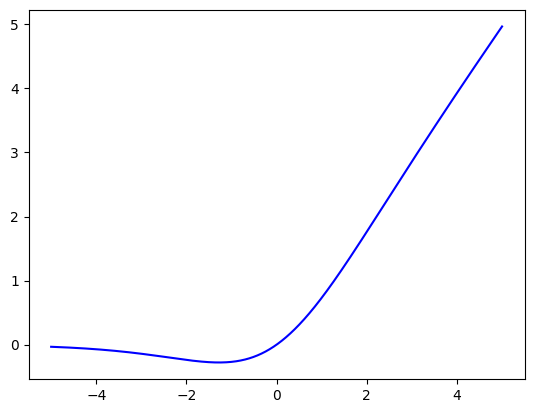

In [ ]:
# Graficar
z = np.linspace(-5, 5,1000)
plt.plot(z, SiLU(z), '-b')
plt.show()

### Consideraciones adicionales sobre las ReLU

Las funciones ReLU tienen la ventaja de acelerar el entrenamiento, ya que cálculo del gradiente es simple. Además, el paso computacional de una unidad ReLU es fácil debido a que los elementos negativos se reducen a 0, sin exponenciales, y sin operaciones de multiplicación o división.

Los gradientes de las unidades que utilizan funciones sigmoides tangentes hiperbólicas son más pequeños que la parte positiva de la ReLU. Esto significa que la
parte positiva se actualiza más rápidamente a medida que progresa el entrenamiento. Sin embargo, esto tiene un coste adicional; el gradiente 0
para valores negativos tiene su propio problema, conocido como "neuronas muertas" *(dead neurons)*, en el que una actualización de gradiente establece los valores entrantes en una ReLU de modo que la salida sea siempre cero.

Las unidades ReLU modificadas como ELU, LReLU o PReLU pueden compensar este efecto. El gradiente de ReLU es 1 para cualquier valor mayor a 1 (DEMOSTRAR). Por el contrario, el gradiente de una unidad sigmoidal es como máximo 0.25 (DEMOSTRAR). Además, tanh tiene un mejor comportamiento para las entradas en una región cercana a 0.

**Ejercicio:** Demostrar que el gradiente de RELU es 1 para cualquier valor mayor a 1

**Ejercicio:** Demostrar que el gradiente de la sigmoide es como máximo $0.25$

## Funciones softsign y softplus

Se definen como sigue:

$$ \mbox{softsign}: f(z) = \dfrac{z}{1+|z|} $$

$$ \mbox{softplus}: f(z) = \ln(1+e^z) $$

In [ ]:
# Defnir
def softsign(z):
  return z/(1+np.abs(z))

def softplus(z):
  return np.log(1+np.exp(z))

In [ ]:
# Graficar

## Función mish

$$ f(z) = z \tanh( \ln(e^z +1) ) $$

In [ ]:
#funcion mish
def mish(z):
  return z*tanh(np.log(np.exp(z)+1))

In [ ]:
# Graficar

# Funciones de activación

Las funciones de activación permiten combartir el problema del desvanecimiento del gradiente durante el proceso de retropropagación.

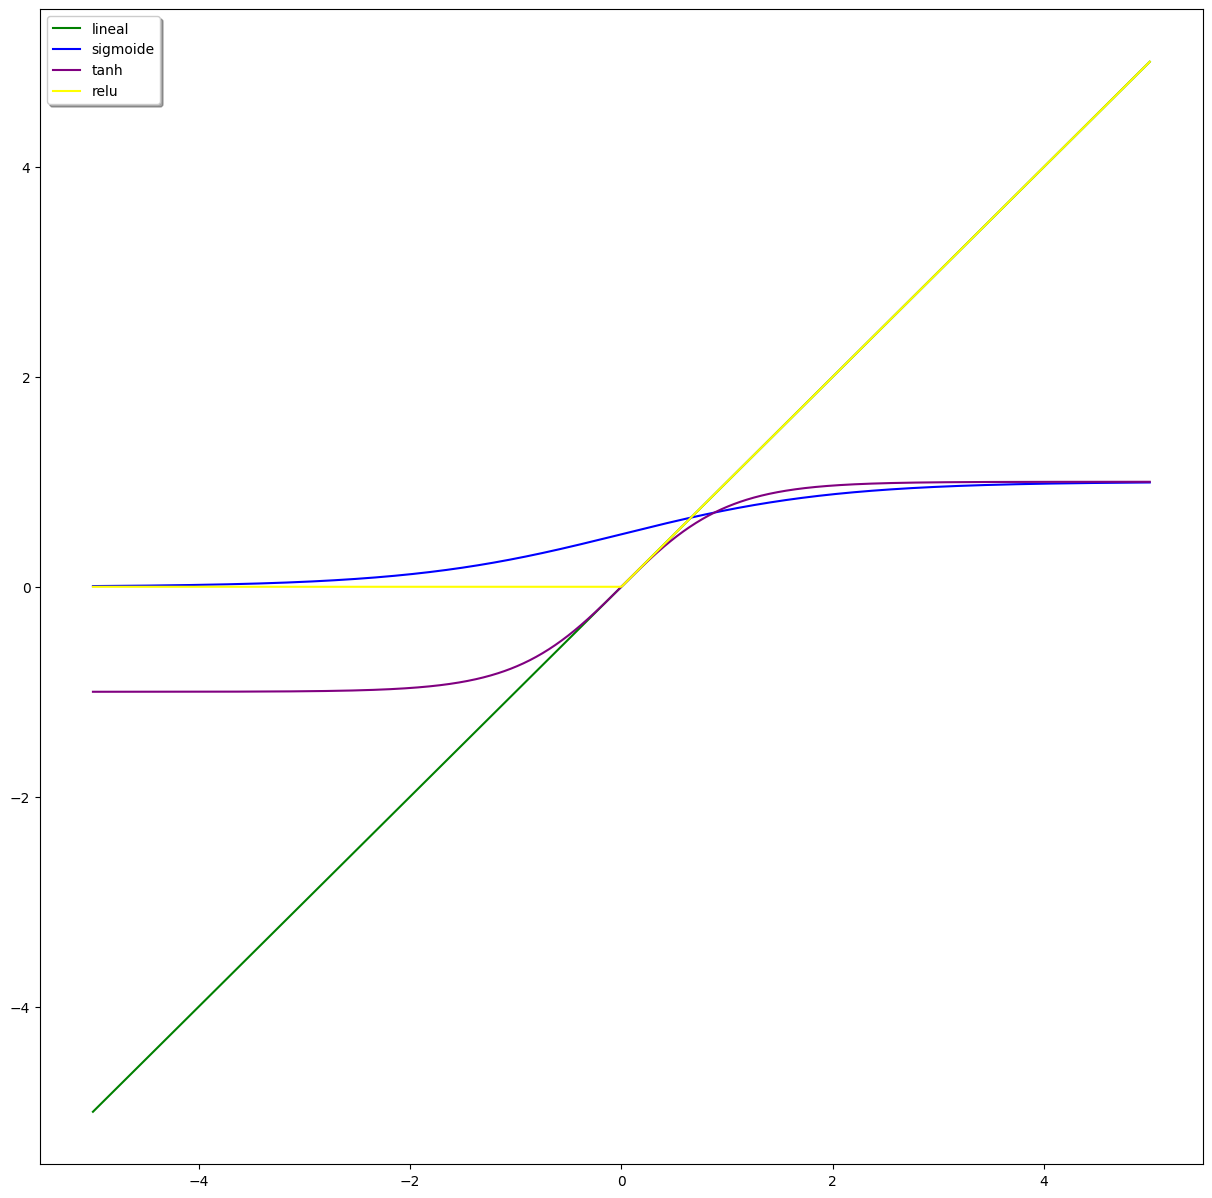

In [ ]:
#Grafica todos
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.plot(z,funcionLineal(z,1), c = 'green',label='lineal')
ax.plot(z, sigmoide(z), c = 'blue',label='sigmoide')
ax.plot(z, tanh(z), c = 'purple', label ='tanh')
ax.plot(z, funcion_ReLU(z), c = 'yellow',label='relu')
legend = ax.legend(loc='upper left', shadow=True, fontsize='10')
plt.show()